In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [69]:
df = pd.read_csv("/kaggle/input/hotel-booking-demand/hotel_bookings.csv")


print(df.info()) 
print(df.head())  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


Here it gives us an error because the dataset contains NaN (Not a Number) or inf (infinity) values.

In [70]:
# Data cleaning

# Handle missing values
df.dropna(inplace=True, subset=['children'])
df.fillna({'agent': 0, 'company': 0}, inplace=True)

# Remove duplicate records
df.drop_duplicates(inplace=True)

In [71]:
# Detect and treat outliers
numerical_cols = ['lead_time', 'adr']
for col in numerical_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]


In [72]:
# Standardize numerical values
df[numerical_cols] = (df[numerical_cols] - df[numerical_cols].mean()) / df[numerical_cols].std()

# Standardize categorical values
df['meal'] = df['meal'].replace({'Undefined': 'SC'})

In [73]:
print(df.info()) 
print(df.head())  

<class 'pandas.core.frame.DataFrame'>
Index: 82646 entries, 2 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           82646 non-null  object 
 1   is_canceled                     82646 non-null  int64  
 2   lead_time                       82646 non-null  float64
 3   arrival_date_year               82646 non-null  int64  
 4   arrival_date_month              82646 non-null  object 
 5   arrival_date_week_number        82646 non-null  int64  
 6   arrival_date_day_of_month       82646 non-null  int64  
 7   stays_in_weekend_nights         82646 non-null  int64  
 8   stays_in_week_nights            82646 non-null  int64  
 9   adults                          82646 non-null  int64  
 10  children                        82646 non-null  float64
 11  babies                          82646 non-null  int64  
 12  meal                            8264

Now, we didnt got any error due to the data cleaning process which did the job of handling these type of errors.

In [74]:
 # Exploratory Data Analysis

# Univariate Analysis
print("Summary Statistics:")
print(df[numerical_cols].describe())  # Summary stats
print("Skewness:")
print(df[numerical_cols].skew())  # Skewness
print("Mode:")
print(df[numerical_cols].mode().iloc[0])  # Mode

Summary Statistics:
          lead_time           adr
count  8.264600e+04  8.264600e+04
mean   8.253527e-17 -1.760753e-16
std    1.000000e+00  1.000000e+00
min   -9.828148e-01 -2.384922e+00
25%   -8.469867e-01 -6.739500e-01
50%   -3.580054e-01 -1.147521e-01
75%    6.063743e-01  6.208901e-01
max    3.037698e+00  2.783898e+00
Skewness:
lead_time    1.038157
adr          0.335324
dtype: float64
Mode:
lead_time   -0.982815
adr         -2.244821
Name: 0, dtype: float64


Frequency Distribution for Categorical Variables:
hotel:
hotel
City Hotel      51493
Resort Hotel    31153
Name: count, dtype: int64
**************************************
arrival_date_month:
arrival_date_month
August       9588
July         9139
May          7918
April        7772
March        7431
June         7272
October      6605
September    6260
February     6053
December     5004
November     4947
January      4657
Name: count, dtype: int64
**************************************
meal:
meal
BB    64754
SC     9823
HB     7777
FB      292
Name: count, dtype: int64
**************************************
country:
country
PRT    25846
GBR     9591
FRA     8563
ESP     6765
DEU     5144
       ...  
BWA        1
UMI        1
MYT        1
MMR        1
FRO        1
Name: count, Length: 174, dtype: int64
**************************************
market_segment:
market_segment
Online TA        49045
Offline TA/TO    13159
Direct           11096
Groups            4220
Corporate         4200


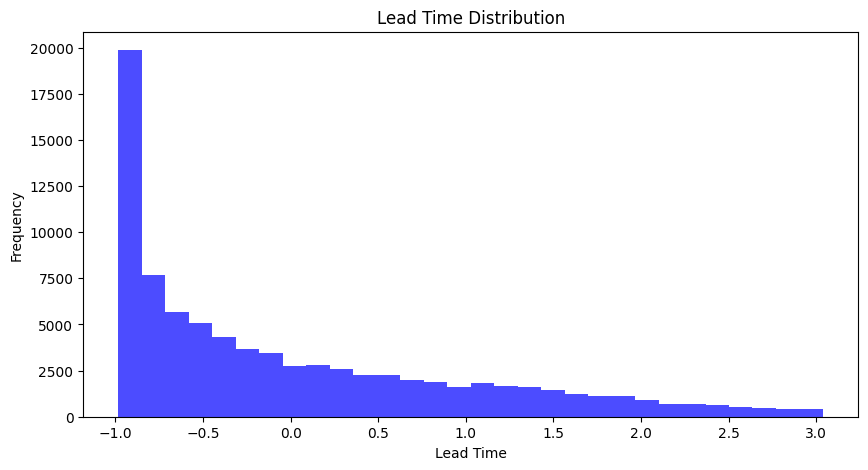

In [75]:
print("Frequency Distribution for Categorical Variables:")
for col in df.select_dtypes(include=['object']).columns:
    print(f"{col}:")
    print(df[col].value_counts())
    print("**************************************")


plt.figure(figsize=(10,5))
plt.hist(df['lead_time'], bins=30, color='blue', alpha=0.7)
plt.title("Lead Time Distribution")
plt.xlabel("Lead Time")
plt.ylabel("Frequency")
plt.show()

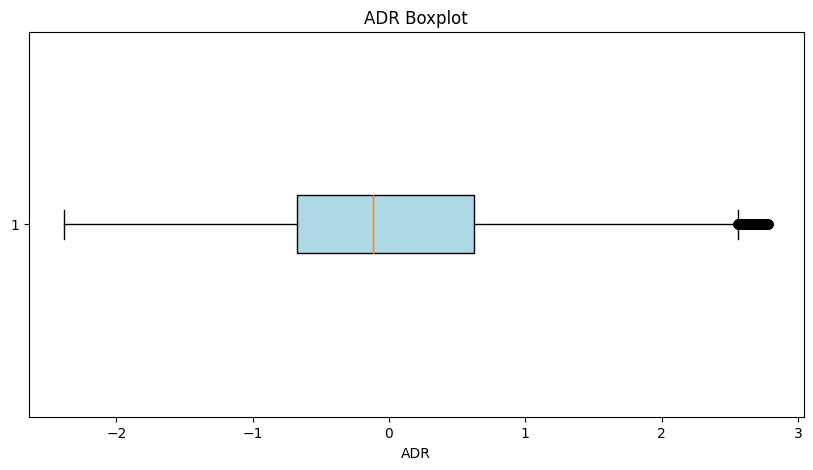

In [76]:
plt.figure(figsize=(10,5))
plt.boxplot(df['adr'], vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title("ADR Boxplot")
plt.xlabel("ADR")
plt.show()


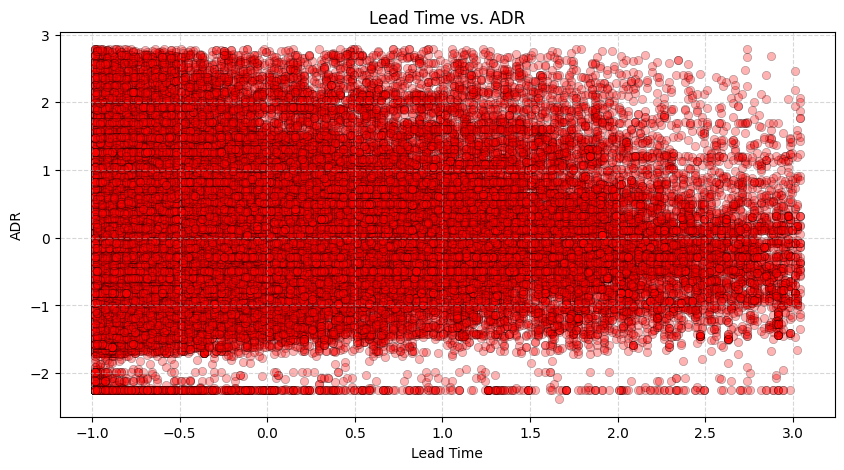

In [77]:
# Bivariate Analysis
plt.figure(figsize=(10,5))
plt.scatter(df['lead_time'], df['adr'], alpha=0.3, color='red', edgecolors='black', linewidth=0.5)
plt.title("Lead Time vs. ADR")
plt.xlabel("Lead Time")
plt.ylabel("ADR")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


<Figure size 1000x500 with 0 Axes>

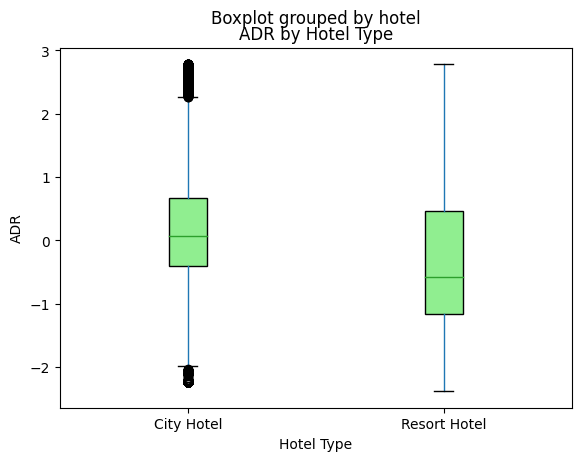

In [78]:
plt.figure(figsize=(10,5))
df.boxplot(column='adr', by='hotel', grid=False, patch_artist=True, boxprops=dict(facecolor='lightgreen'))
plt.title("ADR by Hotel Type")
plt.xlabel("Hotel Type")
plt.ylabel("ADR")
plt.show()

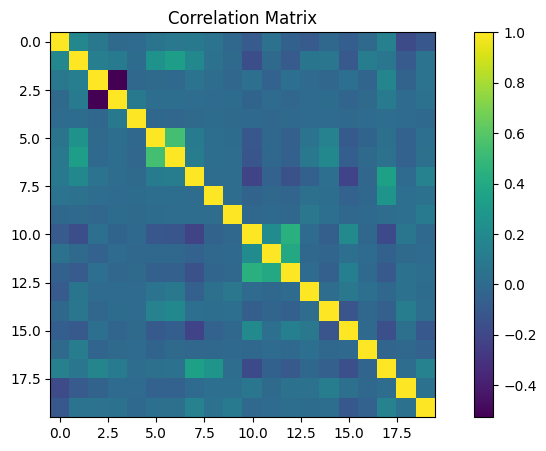

In [79]:
# Correlation Matrix
plt.figure(figsize=(10,5))
numeric_df = df.select_dtypes(include=['number'])
plt.imshow(numeric_df.corr(), interpolation='nearest')
plt.title("Correlation Matrix")
plt.colorbar()
plt.show()


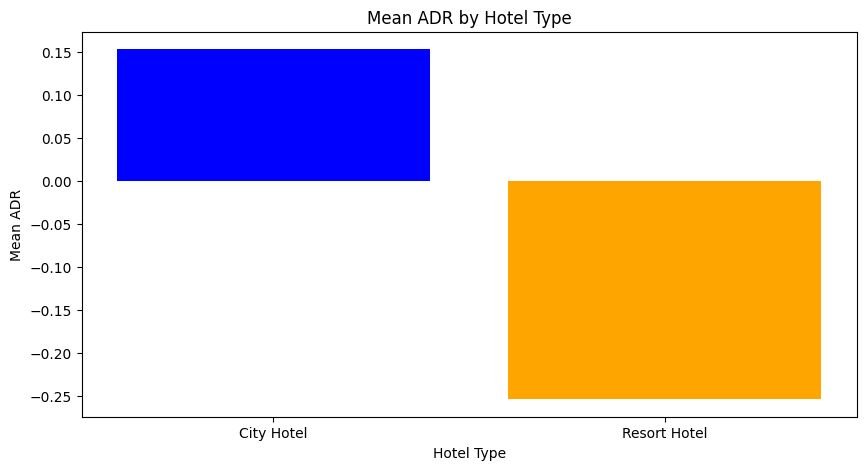

In [80]:
# Bar Plot - Mean ADR by Hotel Type
hotel_adr_mean = df.groupby('hotel')['adr'].mean()
plt.figure(figsize=(10,5))
plt.bar(hotel_adr_mean.index, hotel_adr_mean.values, color=['blue', 'orange'])
plt.title("Mean ADR by Hotel Type")
plt.xlabel("Hotel Type")
plt.ylabel("Mean ADR")
plt.show()

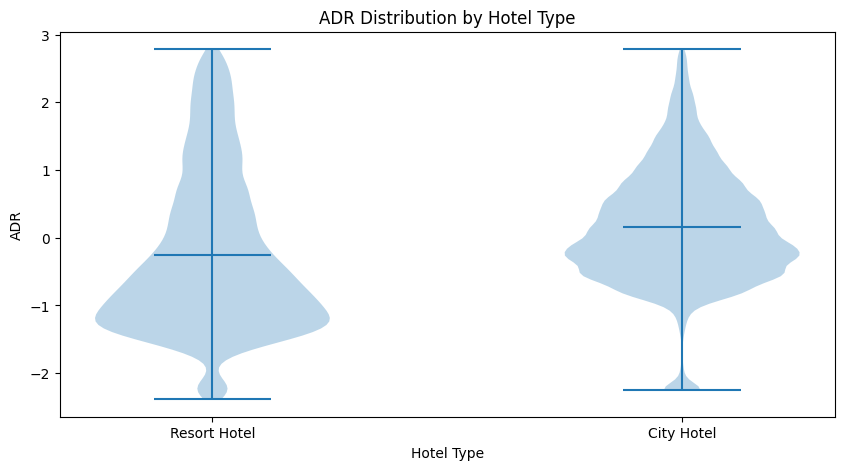

In [81]:
# Violin Plot - ADR Distribution by Hotel Type
plt.figure(figsize=(10,5))
unique_hotels = df['hotel'].unique()
positions = np.arange(len(unique_hotels))
plt.violinplot([df[df['hotel'] == hotel]['adr'] for hotel in unique_hotels], positions=positions, showmeans=True)
plt.xticks(positions, unique_hotels)
plt.title("ADR Distribution by Hotel Type")
plt.xlabel("Hotel Type")
plt.ylabel("ADR")
plt.show()

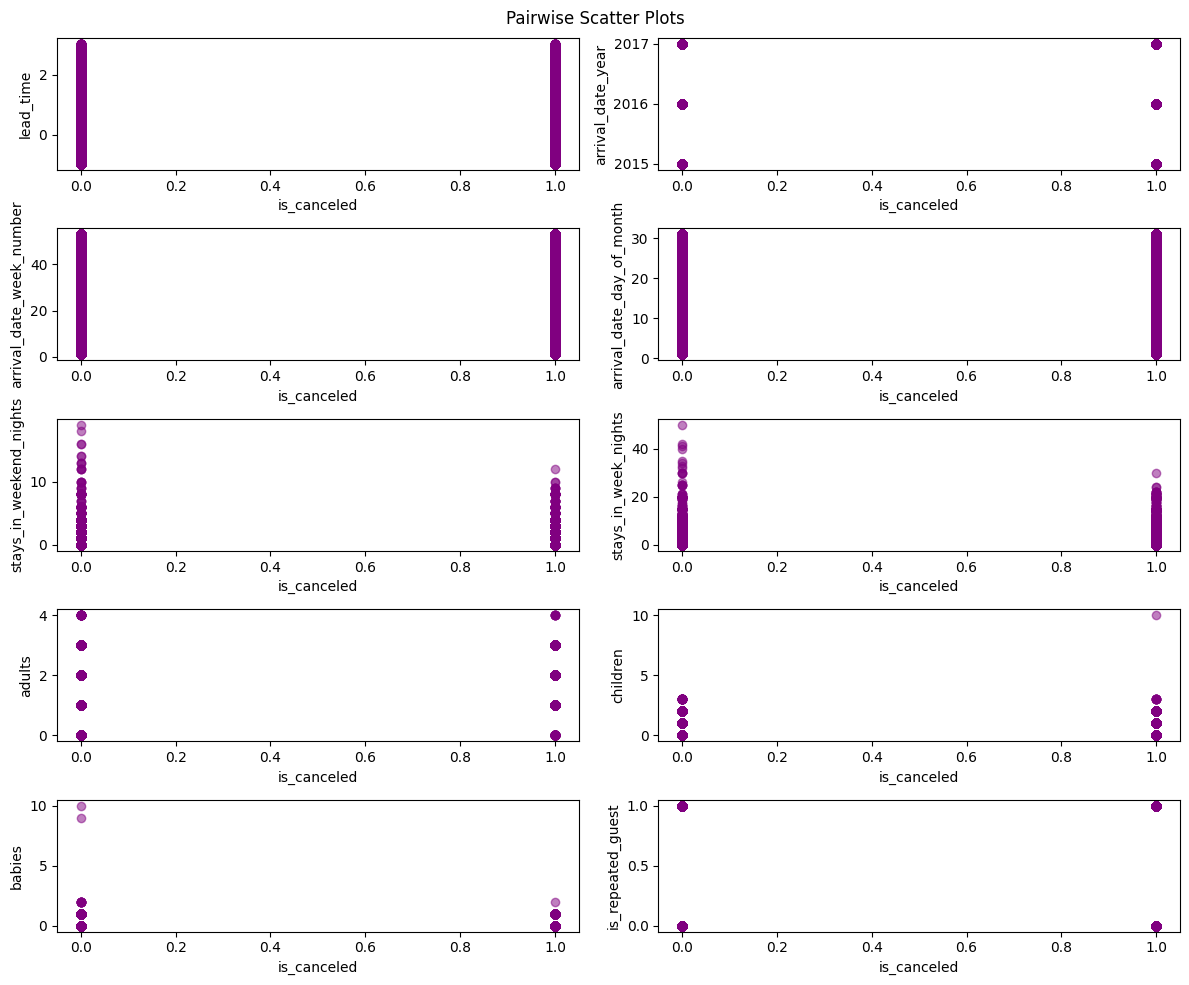

In [82]:
import itertools

# Multivariate Analysis

# Pair Plots Alternative using itertools
plt.figure(figsize=(12, 10))
numeric_cols = list(numeric_df.columns)
pairs = list(itertools.combinations(numeric_cols, 2))
for i, (col1, col2) in enumerate(pairs[:10]):  # Limit number of plots for readability
    plt.subplot(5, 2, i+1)
    plt.scatter(df[col1], df[col2], alpha=0.5, color='purple')
    plt.xlabel(col1)
    plt.ylabel(col2)
plt.suptitle("Pairwise Scatter Plots")
plt.tight_layout()
plt.show()

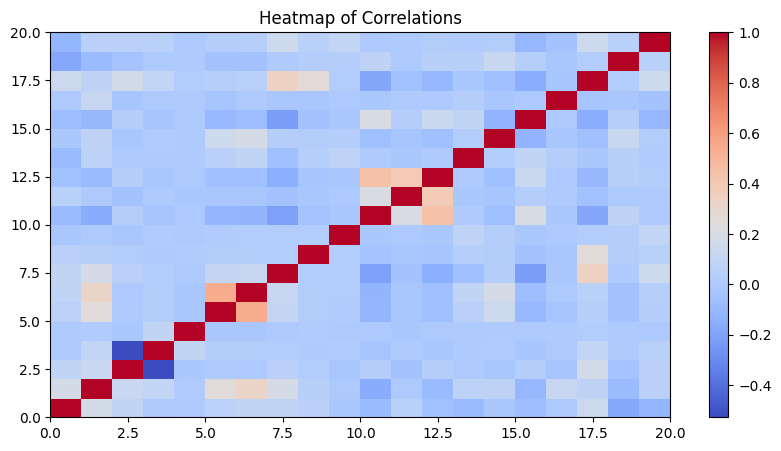

In [ ]:
# Heatmap - Correlation Matrix Visualization
plt.figure(figsize=(10,5))
plt.pcolor(numeric_df.corr(), cmap='coolwarm')
plt.colorbar()
plt.title("Heatmap of Correlations")
plt.show()

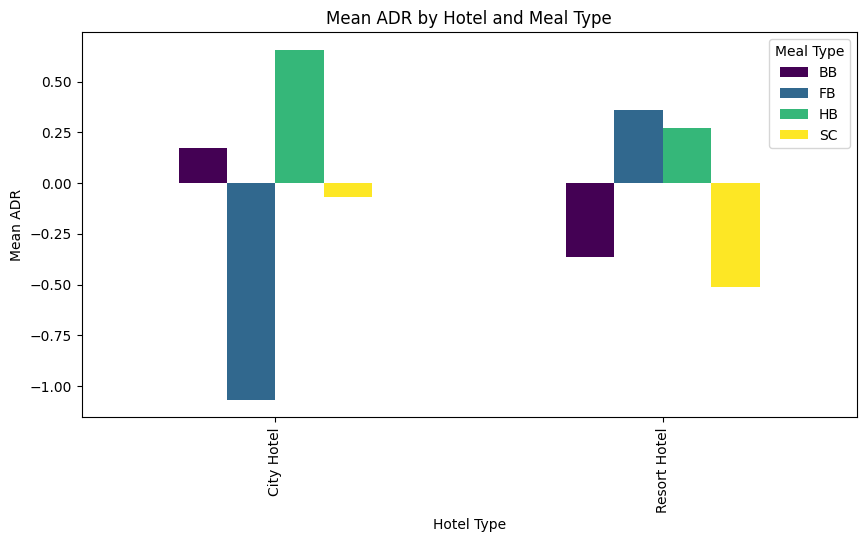

In [84]:
# Grouped Comparisons - Mean ADR by Hotel and Meal Type
grouped_adr = df.groupby(['hotel', 'meal'])['adr'].mean().unstack()
grouped_adr.plot(kind='bar', figsize=(10,5), colormap='viridis')
plt.title("Mean ADR by Hotel and Meal Type")
plt.xlabel("Hotel Type")
plt.ylabel("Mean ADR")
plt.legend(title="Meal Type")
plt.show()
